In [1]:
!pip install git+https://github.com/inseq-team/inseq.git

  Cloning https://github.com/inseq-team/inseq.git to /tmp/pip-req-build-e78nup45
  Running command git clone --filter=blob:none --quiet https://github.com/inseq-team/inseq.git /tmp/pip-req-build-e78nup45
  Resolved https://github.com/inseq-team/inseq.git to commit a1bb88169a6da996ac0249f2bea3c0a7eba68528
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 7.7 MB/s e

In [16]:
!pip uninstall torch
!pip install torch==2.0.1

Found existing installation: torch 2.1.0
Uninstalling torch-2.1.0:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/nvfuser/*
    /usr/local/lib/python3.10/dist-packages/torch-2.1.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? y
  Successfully uninstalled torch-2.1.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.1.0
    Uninstalling triton-2.1.0:
      Successfully uninstalled triton-2.1.0


In [17]:
import json

claims = []
labels = []
evidences = []
links = []

# Open the JSONL file
with open("./COVIDFACT_dataset.jsonl", 'r') as file:
    for index, line in enumerate(file):
        try:
          data = json.loads(line)

          claims.append(data["claim"])
          labels.append(data["label"])
          links.append(data["gold_source"])
          evidence = data["evidence"]

          temp = ""
          for e in evidence[:-1]:
            temp += e
            temp += " "
          temp += evidence[-1]
          evidences.append(temp)
        except:
          print(line, index)

([<matplotlib.patches.Wedge at 0x79c5f5ac5ff0>,
 [Text(-0.923817320629024, -0.5971277569380034, 'REFUTED'),
  Text(0.9238173765361558, 0.5971276704439804, 'SUPPORTED')],
 [Text(-0.5039003567067403, -0.3257060492389109, '68.3%'),
  Text(0.5039003872015395, 0.3257060020603529, '31.7%')])

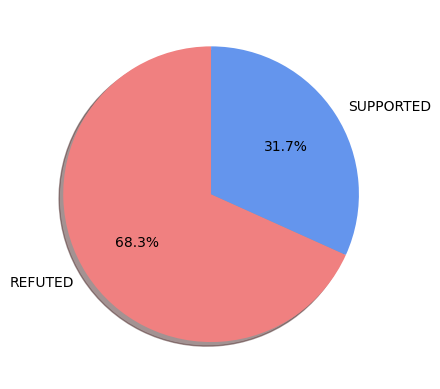

In [18]:
import matplotlib.pyplot as plt

# REFUTED
counter_0 = 0

# SUPPORTED
counter_1 = 1

for l in labels:
  if l == "REFUTED":
    counter_0 += 1
  else:
    counter_1 += 1

text_labels = ["REFUTED", "SUPPORTED"]
total = counter_0 + counter_1
fig, ax = plt.subplots()
size = [counter_0/total, counter_1/total]
ax.pie(size, labels=text_labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=["lightcoral", "cornflowerblue"])

In [20]:
import pandas as pd

name_dict = {
        "claims": claims,
        "labels": labels,
        "evidences": evidences,
        "links": links,
      }

df = pd.DataFrame(name_dict)
df.to_csv('./COVIDFACT_dataset.csv', encoding='utf-8')

In [19]:
!pip install transformers
!pip install optimum
!pip install auto-gptq

In [42]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("TheBloke/Llama-2-7b-Chat-GPTQ")
model = AutoModelForCausalLM.from_pretrained("TheBloke/Llama-2-7b-Chat-GPTQ",torch_dtype=torch.float16, device_map="auto")

Attributing with integrated_gradients...:  98%|█████████▊| 195/198 [01:33<04:39, 93.15s/it]


In [26]:
model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096, padding_idx=0)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (rotary_emb): LlamaRotaryEmbedding()
          (k_proj): QuantLinear()
          (o_proj): QuantLinear()
          (q_proj): QuantLinear()
          (v_proj): QuantLinear()
        )
        (mlp): LlamaMLP(
          (act_fn): SiLUActivation()
          (down_proj): QuantLinear()
          (gate_proj): QuantLinear()
          (up_proj): QuantLinear()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaRMSNorm()
  )
  (lm_head): Linear(in_features=4096, out_features=32000, bias=False)
)

In [23]:
print(claims[1])
print(labels[1])
print(evidences[1])
print(links[1])

Measuring chs-cov-2 neutralizing antibody activity using pseudotyped and chimeric viruses
REFUTED
While each surrogate virus exhibited subtle differences in the sensitivity with which neutralizing activity was detected, the neutralizing activity of both convalescent plasma and human monoclonal antibodies measured using each virus correlated quantitatively with neutralizing activity measured using an authentic SARS-CoV-2 neutralization assay. Here, we describe a collection of approaches based on SARS-CoV-2 spike-pseudotyped, single-cycle, replication-defective human immunodeficiency virus type-1 (HIV-1) and vesicular stomatitis virus (VSV), as well as a replication-competent VSV/SARS- CoV-2 chimeric virus.
https://rupress.org/jem/article/217/11/e20201181/151961/Measuring-SARS-CoV-2-neutralizing-antibody


In [24]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install lark

# Prediction

In [25]:
import json
import os
import copy
import re
import random

import pandas as pd
from tqdm import tqdm

from lark import Lark
import numpy as np

import torch

from transformers import LogitsProcessor, AutoModelForCausalLM, AutoTokenizer


class GuidedDecodingLogitsProcessor(LogitsProcessor):
    def __init__(self, parser, prompt_length, filter_value=-float("Inf"), *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.parser = parser
        self.prompt_length = prompt_length
        self.filter_value = filter_value

    def __call__(self, input_ids, scores):
        valid_tokens = torch.ones_like(scores) * self.filter_value

        # The tokens generated so far
        for b in range(scores.shape[0]):
            generated_tokens = input_ids[b, self.prompt_length:].cpu().tolist()
            next_tokens = self.parser.next_tokens(generated_tokens)
            int_next_tokens = np.array([int(t) for t in next_tokens])

            # Adjust the scores to allow only valid tokens
            valid_tokens[b, int_next_tokens] = scores[b, int_next_tokens]
        return valid_tokens


class GuidedParser:
    """A class defining the mapping between text grammar and tokenized grammar."""
    def __init__(self, init_grammar, tokenizer, model, eos_token=None):

        # The grammar with natural language text
        self.text_grammar = init_grammar

        # The natural language parser
        self.text_parser = Lark(self.text_grammar, parser="lalr")

        # The hugging face tokenizer
        self.tokenizer = tokenizer

        # Store the model being used. This influences some decoding settings
        self.model = model

        # The grammar compiled with tokens from the hugging face tokenizer
        self.token_grammar = self._compile_grammar(self.text_grammar, self.tokenizer)

        # The tokenized parser
        self.token_parser = Lark(self.token_grammar, parser="lalr")

        self.terminal_lookup = {}

        for terminal in self.token_parser.terminals:
            self.terminal_lookup[terminal.name] = terminal.pattern.value

        if eos_token is None:
            if model == "gpt":
                self.eos_token = tokenizer.encode(" [e]")[-1]
            else:
                raise NameError(f"don't know model {model}")
        else:
            self.eos_token = eos_token

    def _compile_grammar(self, grammar, tokenizer):
        """Compiles a grammar into tokens."""

        # Create the tokenizer grammar
        tokenized_grammar = copy.deepcopy(grammar)

        # Find all the terminals
        terminals = re.findall('"([^"]*)"', grammar)

        # Store existing terminals
        existing_terms = {}

        # Records the update rules for the terminals
        indx = 0
        for term in tqdm(terminals):
            tokens = tokenizer.encode(term)

            replacement_rule = "("
            for tok in tokens:
                if tok == 1 and self.model == "t5":
                    continue
                # If it already exists, we don't want to add
                # the terminal again, just use the old one
                if tok in existing_terms:
                    name = existing_terms[tok]
                else:
                    name = f"ANON{indx} "
                    indx += 1
                    newrule = name + ": " + "\"" + str(tok) + "\""
                    tokenized_grammar += f"\n{newrule}"
                    existing_terms[tok] = name
                replacement_rule += name

            # Close the list of terminals
            replacement_rule += ")"

            # Update the terminal with the tokens
            tokenized_grammar = tokenized_grammar.replace("\"" + term + "\"",  replacement_rule)

        tokenized_grammar += "\n%ignore \" \""
        return tokenized_grammar

    def next_tokens(self, tokens):
        """Get the next tokens."""
        string_tokens = ' '.join([str(t) for t in tokens])
        interactive = self.token_parser.parse_interactive(string_tokens)
        interactive.exhaust_lexer()
        return [self.terminal_lookup[acc] for acc in interactive.accepts()]

# noqa: E501
GRAMMAR = r"""
?start: action
action: operation done

done: " [e]"

operation: off | inoff

inoff: " REFUTED"

off: " SUPPORTED"
"""

In [48]:
torch.cuda.empty_cache()

In [28]:
prompt = "Tell me about AI"
prompt_template=f'''
Each 3 items in the following list contains the claims, evidence and prediction. Your task is to make the prediction as one of the labels: REFUTED, SUPPORTED.

claim: {claims[0]}
evidence: {evidence[0]}
prediction: {labels[0]}

claim: {claims[2]}
evidence: {evidence[2]}
prediction: {labels[2]}

claim: {claims[3]}
evidence: {evidence[3]}
prediction: {labels[3]}

claim: {claims[1]}
evidence: {evidence[1]}
prediction:


'''

print("\n\n*** Generate:")

input_ids = tokenizer(prompt_template, return_tensors='pt').input_ids.cuda()

tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = model.config.eos_token_id

parser = GuidedParser(GRAMMAR, tokenizer, model="gpt", eos_token=tokenizer.encode(" [e]")[-1])
guided_preprocessor = GuidedDecodingLogitsProcessor(parser, input_ids.shape[1])

generation = model.greedy_search(input_ids, logits_processor=guided_preprocessor,
                                         pad_token_id=model.config.pad_token_id, eos_token_id=parser.eos_token)

# output = model.generate(inputs=input_ids, temperature=0.7, do_sample=True, top_p=0.95, max_new_tokens=)
print("output:",tokenizer.decode(generation[0]))



*** Generate:


100%|██████████| 3/3 [00:00<00:00, 2727.71it/s]


output: <s> 
Each 3 items in the following list contains the claims, evidence and prediction. Your task is to make the prediction as one of the labels: REFUTED, SUPPORTED.

claim: Measuring sars-cov-2 neutralizing antibody activity using pseudotyped and chimeric viruses
evidence: In Pfizers trial, all four participants who experienced Bells palsy received the vaccine.
prediction: SUPPORTED

claim: Measuring aces-cov-2 neutralizing antibody activity using pseudotyped and chimeric viruses
evidence: As the United Kingdom began administering people with the Pfizer-BioNTech vaccine, four people who got Pfizer's coronavirus vaccine in the firm's trial developed Bell's palsy, a form of temporary facial paralysis, according to US regulators' report on the shot.
prediction: REFUTED

claim: Measuring gps-cov-2 neutralizing antibody activity using pseudotyped and chimeric viruses
evidence: Ill go on to say there were deaths in the trial and none of them were linked to the vaccine. To be clear, fo

In [29]:
print(tokenizer.decode(generation[0]).split(prompt_template))
print(tokenizer.decode(generation[0]).split(prompt_template)[1].split(" ")[2].split("<s>")[0])

['<s> ', '<s>  SUPPORTED<s>  [e]']
SUPPORTED


# Feature Attribution

In [43]:
import inseq
inseq_model = inseq.load_model(model, "attention")

In [46]:
out = inseq_model.attribute(
    input_texts=f"Evidence: {evidences[1]}. Claims: {claims[1]}. Prediction:",
    generated_texts=f"Evidence: {evidences[1]}. Claims: {claims[1]}. Prediction: SUPPORTED",
    n_steps=50,
    internal_batch_size=1
)
res = out.aggregate()
attribution = res.sequence_attributions[0].target_attributions[:, 0].tolist()
temp_idx = np.where(np.isnan(attribution))[0][0] - 1

attribution = attribution[:temp_idx]

Attributing with attention...: 100%|██████████| 207/207 [00:01<00:00,  3.78it/s]


In [47]:
out.show()

,▁S,UP,PORT,ED
<s>,0.352,0.357,0.432,0.42
▁Ev,0.003,0.002,0.002,0.002
idence,0.002,0.002,0.001,0.002
:,0.005,0.002,0.002,0.003
▁While,0.004,0.001,0.001,0.001
▁each,0.001,0.001,0.0,0.001
▁sur,0.001,0.001,0.001,0.0
rog,0.001,0.002,0.001,0.001
ate,0.001,0.001,0.001,0.001
▁virus,0.001,0.001,0.001,0.001


# Rationalization


In [49]:
prompt_template=f'''
claim: Measuring aces-cov-2 neutralizing antibody activity using pseudotyped and chimeric viruses
evidence: As the United Kingdom began administering people with the Pfizer-BioNTech vaccine, four people who got Pfizer's coronavirus vaccine in the firm's trial developed Bell's palsy, a form of temporary facial paralysis, according to US regulators' report on the shot.
Based on evidence, the prediction of the claim is refuted. Show me the reasoning.
'''

print("\n\n*** Generate:")

input_ids = tokenizer(prompt_template, return_tensors='pt').input_ids.cuda()
output = model.generate(inputs=input_ids, temperature=0.7, do_sample=True, top_p=0.95, top_k=40, max_new_tokens=512)
print(tokenizer.decode(output[0]))



*** Generate:


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1421: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


<s> 
claim: Measuring aces-cov-2 neutralizing antibody activity using pseudotyped and chimeric viruses
evidence: As the United Kingdom began administering people with the Pfizer-BioNTech vaccine, four people who got Pfizer's coronavirus vaccine in the firm's trial developed Bell's palsy, a form of temporary facial paralysis, according to US regulators' report on the shot.
Based on evidence, the prediction of the claim is refuted. Show me the reasoning.
Reasoning: The evidence provided is a report from US regulators on the Pfizer-BioNTech vaccine, which does not provide any information about measuring aces-cov-2 neutralizing antibody activity using pseudotyped and chimeric viruses. The report only discusses the adverse events observed in the trial, including Bell's palsy in four participants. Therefore, the claim is refuted.</s>


In [53]:
print(tokenizer.decode(output[0]).split(prompt_template))
print(tokenizer.decode(output[0]).split(prompt_template)[1][:-4])

['<s> ', "Reasoning: The evidence provided is a report from US regulators on the Pfizer-BioNTech vaccine, which does not provide any information about measuring aces-cov-2 neutralizing antibody activity using pseudotyped and chimeric viruses. The report only discusses the adverse events observed in the trial, including Bell's palsy in four participants. Therefore, the claim is refuted.</s>"]
Reasoning: The evidence provided is a report from US regulators on the Pfizer-BioNTech vaccine, which does not provide any information about measuring aces-cov-2 neutralizing antibody activity using pseudotyped and chimeric viruses. The report only discusses the adverse events observed in the trial, including Bell's palsy in four participants. Therefore, the claim is refuted.


# Counterfactual Generation

In [55]:
prompt_template=f'''
claim: Measuring aces-cov-2 neutralizing antibody activity using pseudotyped and chimeric viruses
evidence: As the United Kingdom began administering people with the Pfizer-BioNTech vaccine, four people who got Pfizer's coronavirus vaccine in the firm's trial developed Bell's palsy, a form of temporary facial paralysis, according to US regulators' report on the shot.
Based on evidence, the prediction of the claim is refuted.
Generate a counterfactual for claim only such that it will be predicted as supported based on evidence. Let's think step by step.
'''

print("\n\n*** Generate:")

input_ids = tokenizer(prompt_template, return_tensors='pt').input_ids.cuda()
output = model.generate(inputs=input_ids, temperature=0.7, do_sample=True, top_p=0.95, top_k=40, max_new_tokens=512)
print(tokenizer.decode(output[0]))



*** Generate:
<s> 
claim: Measuring aces-cov-2 neutralizing antibody activity using pseudotyped and chimeric viruses
evidence: As the United Kingdom began administering people with the Pfizer-BioNTech vaccine, four people who got Pfizer's coronavirus vaccine in the firm's trial developed Bell's palsy, a form of temporary facial paralysis, according to US regulators' report on the shot.
Based on evidence, the prediction of the claim is refuted. 
Generate a counterfactual for claim only such that it will be predicted as supported based on evidence. Let's think step by step.
* Claim: Measuring aces-cov-2 neutralizing antibody activity using pseudotyped and chimeric viruses.
* Evidence: The World Health Organization (WHO) has developed a standardized assay for measuring aces-cov-2 neutralizing antibody activity using pseudotyped and chimeric viruses.
* Counterfactual: Measuring aces-cov-2 neutralizing antibody activity using pseudotyped and chimeric viruses does not provide accurate resu